In [10]:
%load_ext autoreload
%autoreload 2
from main import *
from intparams import *
from restop import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
reslist = rtpreader('example/thy.rtp', 'example/cy3.rtp')
print(reslist)

{'NTHY': <restop.resType object at 0x7fa6e2395fd0>, 'CY3T': <restop.resType object at 0x7fa6e2395e48>}


In [12]:
ff = itpreader('example/charmm36.itp', 'example/ffbonded.itp', 'example/ffnonbonded.itp')

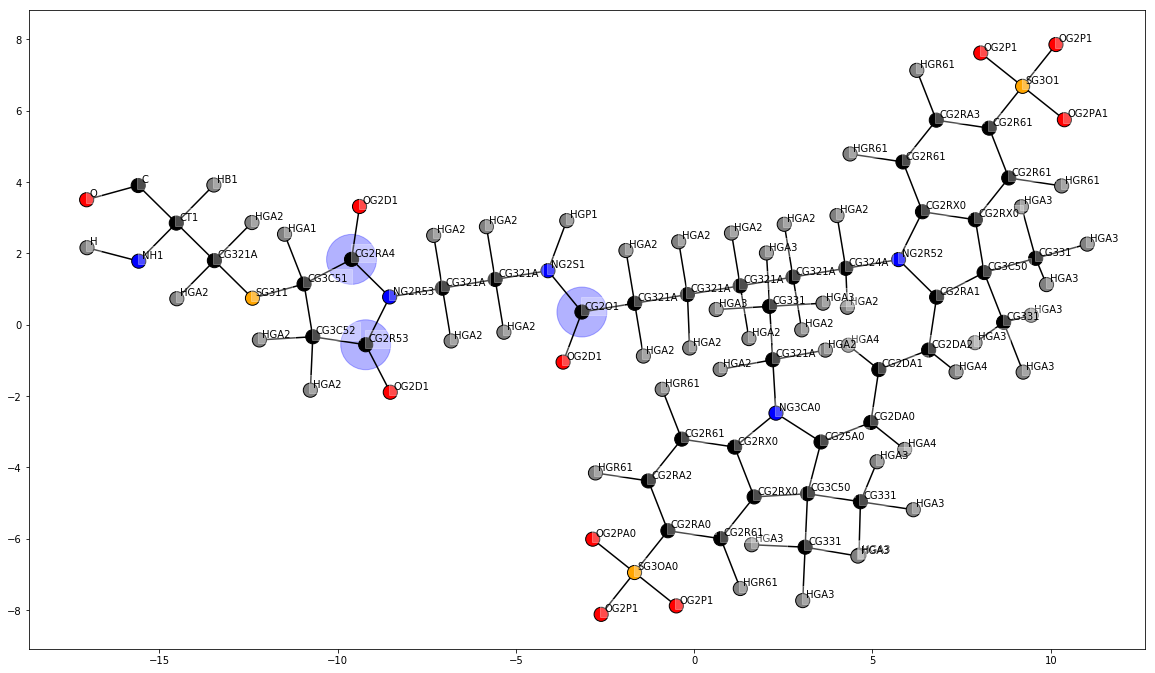

In [13]:
cy3 = reslist['CY3T']
cy3.ff = ff
cy3.Draw(captions = 'types', ShowImpropers = 'rtp', ShowMissingAngles = True, ShowMissingDihedrals = True)

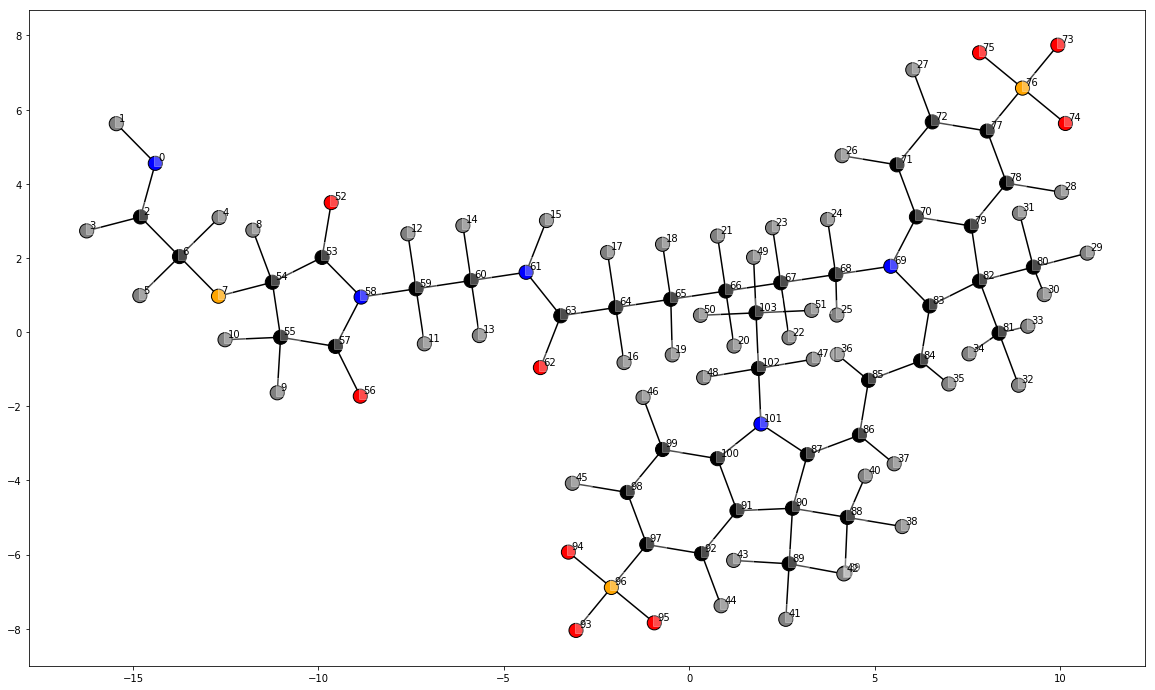

In [14]:
cy3.RemoveAtom(105)
cy3.RemoveAtom(104)
cy3.Draw(captions = 'numbers')

In [15]:
cy3.AddAttachedAtom('CLQ1', 'C', 'CT3', idx2bond = 2, order = 'single')
cy3.AddAttachedAtom('HLQ1', 'H', 'HGA3', idx2bond = 104)
cy3.AddAttachedAtom('HLQ2', 'H', 'HGA3', idx2bond = 104)
cy3.AddAttachedAtom('HLQ3', 'H', 'HGA3', idx2bond = 104)

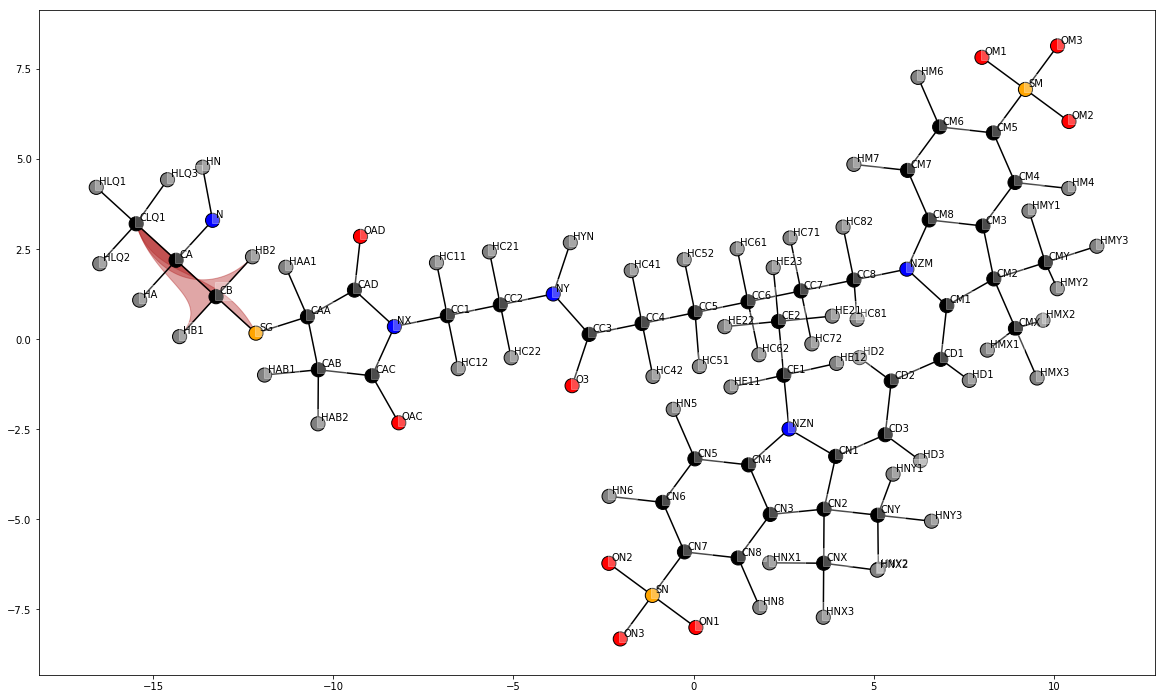

In [16]:
cy3.Draw(captions = 'names', ShowMissingDihedrals = True)

In [17]:
cy3.name = "CY35"
cy3.WriteRtp()
cy3.WriteSuppBonded()

No unparametrized ff detected! Either you're good, or haven't called 'res.WriteExtraFF()' function. Try the latter.


In [18]:
cy3.WriteExtraFF()
for bond in cy3.extraff.Bonded.bonds:
    print(bond)

('CT3', 'HGA3')


In [22]:
cy3.SetBondParams(('CT3', 'HGA3'), f = 4, b0 = 1.432)
cy3.WriteSuppBonded()